In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from mpl_toolkits.basemap import Basemap
#plt.rcParams['figure.figsize'] = (20.0, 10.0)



In [183]:
df = pd.read_csv('data.csv') #loading data
#print(df.head()) 
df.shape # 2722 rows and 15 columns 
#data published originally at the Guardian Apr 15, 2011

(2722, 15)

In [184]:
#Data preparation 
#deleting repeated columns 

df = df.drop(['Name in the language','Name in French', 'Name in Spanish', 'ISO639-3 codes','Sources'], axis=1)
df.shape #2722,9

#another way
#df.drop(data.columns[[0, 1, 2, 3, 5, 6, 8, 9, 11, 14]], axis=1, inplace=True)
print(df.columns)
#'ID', 'Name in English', 'Countries','Degree of endangerment', 'Alternate names', 'Number of speakers',
# 'Latitude', 'Longitude', 'Description of the location'])

#print(df['Degree of endangerment'].unique()) #names of the columns
#print(df.head())


Index(['ID', 'Name in English', 'Countries', 'Country codes alpha 3',
       'Degree of endangerment', 'Alternate names', 'Number of speakers',
       'Latitude', 'Longitude', 'Description of the location'],
      dtype='object')


In [185]:
#renaming some column names
df.rename(columns={'Number of speakers': 'Speakers', 
                   'Degree of endangerment': 'Endangerment',
                   'Name in English':'Language',
                  'Country codes alpha 3':'Country code'}, inplace=True)


In [182]:
#df = df.dropna()
df.shape
df.Speakers.count()

2539

In [191]:
#df['Speakers'] = 
df['Speakers'].dropna()?
#df['Speakers'] = df['Speakers'].fillna(df["Speakers"].min()).astype(int)

#df.shape
#after .dropna, the number of rows reduces to 2536, from 2721
#df.head()
#print(df.Speakers)

SyntaxError: invalid syntax (<ipython-input-191-5cbde309ab07>, line 2)

In [194]:
.dropna()?

SyntaxError: invalid syntax (<ipython-input-194-4c9aad8e5ab2>, line 1)

In [195]:
print(df.columns)

AttributeError: 'Series' object has no attribute 'columns'

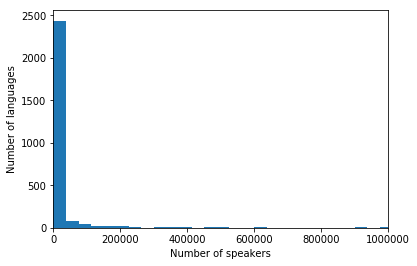

In [176]:
#First visualization- what is the distribution of speakers in endangered languages

#plotting a histogram to see the distribution of the number of speakers in these endangered langauges 
plt.hist(df['Speakers'], bins=200)
plt.xlim(0,1000000)
plt.xlabel('Number of speakers')
plt.ylabel('Number of languages')
plt.show()

#This plot shows that a large number of endangered langauges have very low number of speakers




Text(0.5,1,'Language count for language endangerment levels')

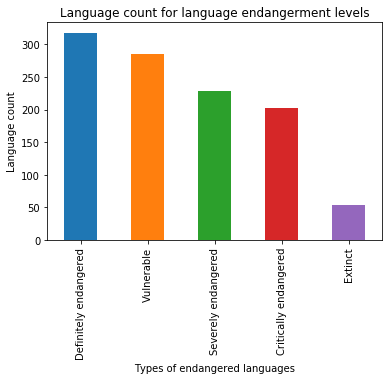

In [129]:
#Question: Which endangerment level has the most number of languages?

df['Endangerment'].value_counts().plot(kind='bar')
plt.ylabel('Language count')
plt.xlabel('Types of endangered languages')
plt.title('Language count for language endangerment levels')

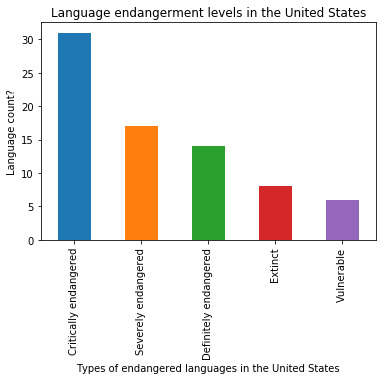

In [144]:
#Q: What is the endangered language situation in the United States? 

df[df.Countries == 'United States of America'].Endangerment.value_counts().plot(kind='bar')

plt.ylabel('Language count?')
plt.xlabel('Types of endangered languages in the United States')
plt.title('Language endangerment levels in the United States')
plt.show()
##Question: how to sort by a given order 

#Stack overflow example
#order = ['Mon', 'Tues', 'Weds','Thurs','Fri','Sat','Sun']
#df.pivot('day','group','amount').loc[order].plot(kind='bar')
order = ['Vulnerable', 'Definitely endangered', 'Severely endangered',
       'Critically endangered', 'Extinct']
#df.Endangerment('Vulnerable').loc[order].plot(kind='bar')

plt.show()

In [ ]:
#Another way
language_spoken_USA = df[df['Country code'].str.contains('USA') == True]
len(language_spoken_USA)

df[df['Country code'].str.contains('USA')].Endangerment.value_counts().plot(kind='bar')


Text(0.5,1,'Language endangerment levels in India')

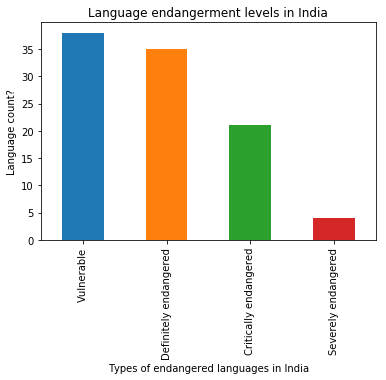

In [131]:
#Same distribution in India 

df[df.Countries == 'India'].Endangerment.value_counts().plot(kind='bar')

plt.ylabel('Language count?')
plt.xlabel('Types of endangered languages in India')
plt.title('Language endangerment levels in India')


In [146]:
#Q: which countries have the most number of endangered languages? 

df.columns


Index(['ID', 'Language', 'Countries', 'Country code', 'Endangerment',
       'Alternate names', 'Speakers', 'Latitude', 'Longitude',
       'Description of the location'],
      dtype='object')

In [150]:
number_of_speakers = df[['Language', 'Speakers']].sort_values('Speakers', ascending=True)
print(number_of_speakers)

                                      Language   Speakers
2536                                   ǁKu ǁ'e        0.0
2399                                     Kulun        0.0
2398                                    Krevin        0.0
2397                                    Krenjê        0.0
2396                                      Kott        0.0
2394                                  Konomihu        0.0
2390                             Khaccaḍ Bhoṭe        0.0
2386                                Kemi Saami        0.0
2377                                     Kansa        0.0
2374                                     Kamas        0.0
2373                    Judeo-Berber (Morocco)        0.0
2367  Huron-Wyandot (United States of America)        0.0
2366                                  Hukumina        0.0
2343                      Eel River Athabaskan        0.0
2339                                      Dura        0.0
2331                                      Deti        0.0
2327          

In [141]:
#creating a pie plot for languages in the USA

#language_spoken_USA.plot.pie(figsize=(6,6), subplots=True, ignore=True)

ValueError: pie doesn't allow negative values

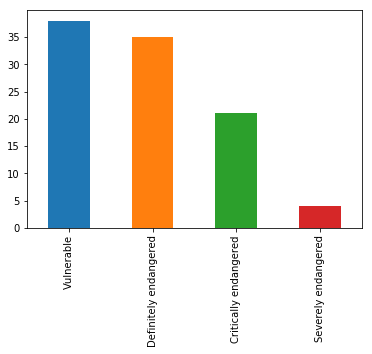

In [92]:
df[df.Countries == 'India'].Endangerment.value_counts().plot(kind='bar')

<bound method Series.unique of 0                                                   Italy
2       Germany, Denmark, Netherlands, Poland, Russian...
5       Albania, Germany, Austria, Belarus, Bosnia and...
6                                                  Israel
7                                                   India
8                           Germany, Belgium, Netherlands
10                                           India, Nepal
11          Bolivia (Plurinational State of), Chile, Peru
15                                                 Turkey
16                                                  India
18                                                  India
19                                                  India
20      United Kingdom of Great Britain and Northern I...
21      Albania, Bulgaria, The former Yugoslav Republi...
22                           Belgium, France, Netherlands
23                                     Russian Federation
26                                       

TypeError: len() of unsized object

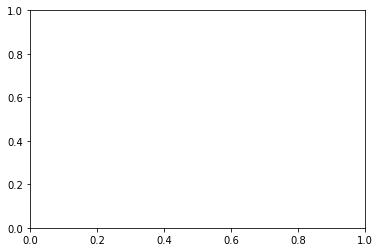

In [89]:

len(df.Name) # there are 1090 languages
print(df.Countries.unique)
plt.pie(df.Countries.count())

In [84]:
##process data to create counts by country 

#split the place on commas
locations = df.Countries.str.split(',',1).tolist() #returns a list
locations=[x for x in locations if str(x) != 'nan']
countries = []
locations

[['Italy'],
 ['Germany', ' Denmark, Netherlands, Poland, Russian Federation'],
 ['Albania',
  ' Germany, Austria, Belarus, Bosnia and Herzegovina, Bulgaria, Croatia, Estonia, Finland, France, Greece, Hungary, Italy, Latvia, Lithuania, The former Yugoslav Republic of Macedonia, Netherlands, Poland, Romania, United Kingdom of Great Britain and Northern Ireland, Russian Federation, Slovakia, Slovenia, Switzerland, Czech Republic, Turkey, Ukraine, Serbia, Montenegro'],
 ['Israel'],
 ['India'],
 ['Germany', ' Belgium, Netherlands'],
 ['India', ' Nepal'],
 ['Bolivia (Plurinational State of)', ' Chile, Peru'],
 ['Turkey'],
 ['India'],
 ['India'],
 ['India'],
 ['United Kingdom of Great Britain and Northern Ireland'],
 ['Albania',
  ' Bulgaria, The former Yugoslav Republic of Macedonia, Romania, Serbia'],
 ['Belgium', ' France, Netherlands'],
 ['Russian Federation'],
 ['India'],
 ['India', ' Nepal'],
 ['Peru'],
 ['France', ' Italy, Monaco'],
 ['Hungary', ' Poland, Romania, Slovakia, Ukraine'],


In [70]:
df.Speakers.value_counts?

In [ ]:
.value_counts

In [79]:
index = np.arange(len([df.Endangerment]))
#print(len(df.Endangerment))



In [36]:
#showing % at the y axis
plt.subplot?

In [35]:
## Creating a stacked bar chart
df.plot.bar?
#df[['Number of speakers', 'Degree of endangerment']].plot.bar(stacked=True)


In [ ]:
df..plot.bar

In [ ]:
.plot.bar

['Vulnerable' 'Definitely endangered' 'Severely endangered'
 'Critically endangered' 'Extinct']


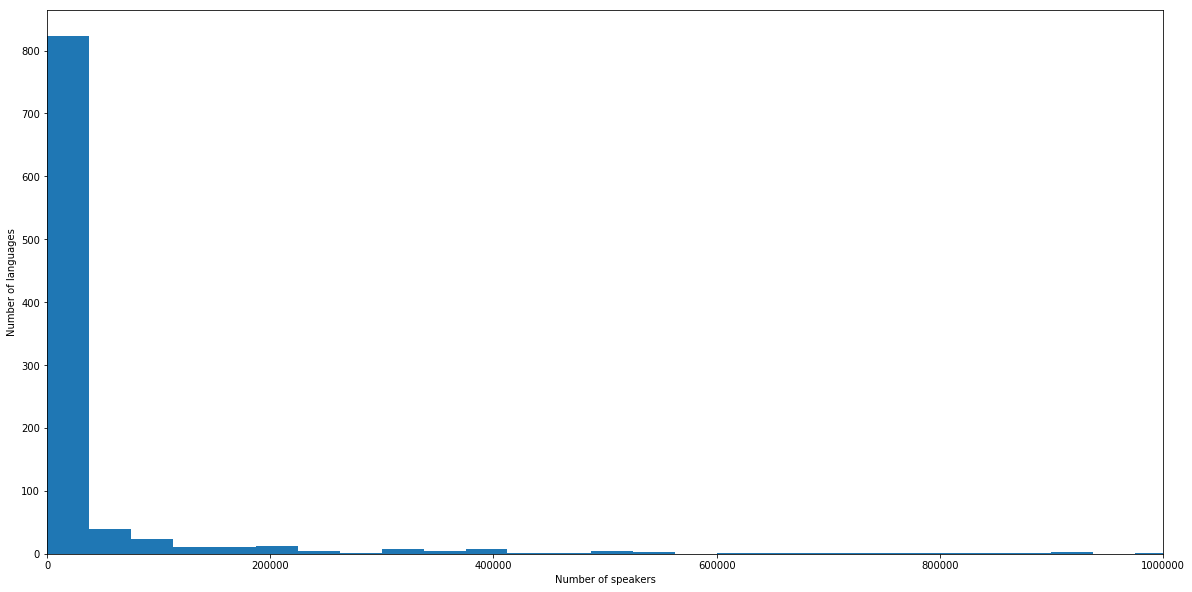

In [33]:


plt.hist(df['Number of speakers'], bins=200)
plt.xlim([0,1000000])
plt.xlabel("Number of speakers")

plt.ylabel("Number of languages")
plt.show()



In [50]:
#plt.hist?
df.describe()
(df['Number of speakers'].max() - df['Number of speakers'].min())/200 #definition of bin
1000000/37500 #number of bins 

26.666666666666668

In [20]:
#Stacked bar plot plotting different levels of endangerment in languages 
# count for speakers for each level
df.groupby(['Degree of endangerment']).count() #stat of all diff groups


,ID,Name in English,Countries,ISO639-3 codes,Alternate names,Number of speakers,Latitude,Longitude,Description of the location
Degree of endangerment,,,,,,,,,
Critically endangered,185,185,185,185,185,185,185,185,185
Definitely endangered,286,286,286,286,286,286,286,286,286
Extinct,45,45,45,45,45,45,45,45,45
Severely endangered,209,209,209,209,209,209,209,209,209
Vulnerable,268,268,268,268,268,268,268,268,268


In [23]:
df['Description of the location']
df['Countries'].unique().shape


(142,)

In [32]:
df['Number of alternative names'] = df['Alternate names'].apply(lambda x: len(x.split(';')))
df.head()

#now counted the number of alternative names and made a column with the number of alternative names
#next step is to do a scatterplot to see if there's a correlation between the number of names and how ancient a language is. 

######## as of 2nd mentor meeting. 

,ID,Name in English,Countries,ISO639-3 codes,Degree of endangerment,Alternate names,Number of speakers,Latitude,Longitude,Description of the location,Number of alternative names
0,1022,South Italian,Italy,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,7500000.0,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz...",4
2,383,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",4800000.0,53.4029,10.3601,"northern Germany, the north-eastern part of th...",1
5,405,Romani,"Albania, Germany, Austria, Belarus, Bosnia and...","rmc, rmf, rml, rmn, rmo, rmw, rmy",Definitely endangered,"sinti, vlax, calò",3500000.0,46.3165,22.3681,"many European countries, most densely in East-...",1
6,2211,Yiddish (Israel),Israel,ydd,Definitely endangered,Judeo-German,3000000.0,32.0833,34.8333,"most speakers now live outside Europe, mainly ...",1
7,1586,Gondi,India,gon,Vulnerable,Gondi; Gaudi; Gondiva; Gondwadi; Goondile; Gou...,2713790.0,19.5804,80.4418,"Madhya Pradesh (Betul, Chhindwara, Seoni, Mand...",10


In [28]:
Alt_name_numbers = len(df['Alternate names'].split(';'))

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
print(df['Number of speakers'].isnull().sum())

df['Number of speakers'] = df['Number of speakers'].astype(int)

#df.Name_in_Country.value_counts().plot(kind = "bar")

df.describe()

import seaborn as sns

sns.distplot(df['Number of speakers'])
sns.distplot(df['Number of speakers'].dropna().astype(int))


#plots suggested by Lauren 

#plt.hist(df['Number_of_speakers'])
#
#df.Name_in_Country.value_counts().plot(kind = "bar")
#
#Chart 2 df.Countries.value_counts().plot(kind = "bar")
#
#Chart 3: df.Degree_of_Endagerment.value_counts().plot(kind = "bar")


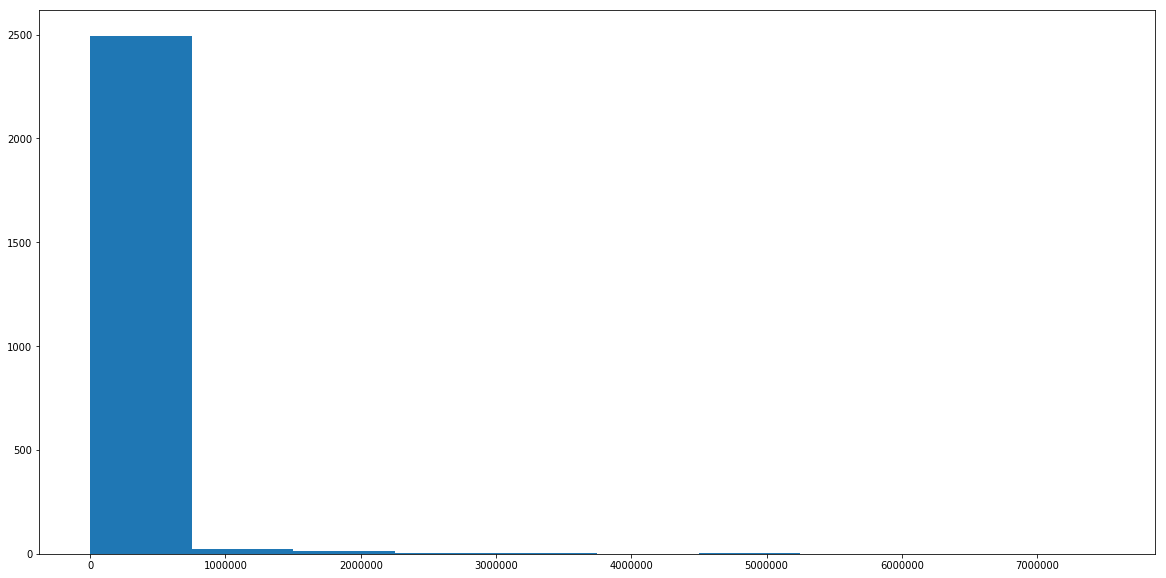

In [27]:

#sns.distplot(df['Number of speakers'].dropna().astype(int))
plt.hist(df['Number of speakers'].dropna().astype(int))
plt.show()



In [13]:
#creating country variables 
India = df[df.Countries == "India"]
usa = df[df.Countries == "United States of America"]
Mexico = df[df.Countries == "Mexico"]
Canada = df[df.Countries == "Canada"]

plt.hist(df['Number_of_speakers'])
plt.show()



KeyError: 'Number_of_speakers'

In [ ]:
plt.figure(figsize=(15,8))
m = Basemap(projection = 'mill', llcrnrlat = 5, urcrnrlat = 40, llcrnrlon = 65, urcrnrlon = 98, resolution = 'h')
m.drawcoastlines()
m.drawcountries()

x, y = m(list(india_extinct["Longitude"].astype(float)), list(india_extinct["Latitude"].astype(float)))
m.plot(x, y, 'go', markersize = 10, alpha = 0.8)

plt.title('Extinct Languages - India')
plt.show()

In [ ]:
#plt.scatter(df['Number of speakers']/1000, df['Degree of endangerment'],  color='red', label='all')
plt.scatter(India['Number of speakers']/1000, India['Degree of endangerment'],  color='blue', label='India')
plt.scatter(usa['Number of speakers']/1000, usa['Degree of endangerment'],  color='cyan', label='USA')
plt.scatter(Mexico['Number of speakers']/1000, Mexico['Degree of endangerment'],  color='red', label='Mexico')
plt.scatter(Canada['Number of speakers']/1000, Canada['Degree of endangerment'],  color='yellow', label='Canada')
plt.xlabel('Number of speakers in thousands')
plt.ylabel('Degrees of endangerment')
plt.title('Speakers for the degrees of endangerment')
plt.legend()

plt.show()

#extinct = df[df["Degree of endangerment"] == "Extinct"]
#india_extinct = df[(df.Countries == "India") & (df["Degree of endangerment"] == "Extinct")]
#usa_extinct = df[(df.Countries == "United States of America") & (df["Degree of endangerment"] == "Extinct")]
#
#plt.figure(figsize=(15,8))
#m = Basemap(projection = 'mill', llcrnrlat = 5, urcrnrlat = 37, llcrnrlon = 65, urcrnrlon = 98, resolution = 'h')
#m.drawcoastlines()
#m.drawcountries()
#
#x, y = m(list(india["Longitude"].astype(float)), list(india["Latitude"].astype(float)))
#m.plot(x, y, 'go', markersize = 10, alpha = 0.8)
#
#plt.title('Extinct and Endangered Languages - India')
#plt.show()
#


In [ ]:

plt.figure(figsize=(15,8))
m = Basemap(projection='mill', llcrnrlat = 20, urcrnrlat = 50, llcrnrlon = -130, urcrnrlon = -60, resolution = 'h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

x, y = m(list(usa["Longitude"].astype(float)), list(usa["Latitude"].astype(float)))
m.plot(x, y, 'go', markersize = 10, alpha = 0.8, color = "blue")

plt.title('Extinct and Endangered Languages in USA')
plt.show()



In [ ]:
plt.figure(figsize=(15,8))
m = Basemap(projection='mill', llcrnrlat = 20, urcrnrlat = 50, llcrnrlon = -130, urcrnrlon = -60, resolution = 'h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

x, y = m(list(usa_extinct["Longitude"].astype(float)), list(usa_extinct["Latitude"].astype(float)))
m.plot(x, y, 'go', markersize = 10, alpha = 0.8, color = "blue")

plt.title('Extinct Languages in USA')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
m = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'h')
m.drawcoastlines()
m.drawcountries()

x, y = m(list(df["Longitude"].astype(float)), list(df["Latitude"].astype(float)))
m.plot(x, y, 'go', markersize = 10, alpha = 0.7, color = "red")

plt.title('Extinct and Endangered Languages Across the World')
plt.show()

In [ ]:

plt.figure(figsize=(15,8))
m = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'h')
m.drawcoastlines()
m.drawcountries()

x, y = m(list(extinct["Longitude"].astype(float)), list(extinct["Latitude"].astype(float)))
m.plot(x, y, 'go', markersize = 10, alpha = 0.8, color = "maroon")

plt.title('Extinct Languages Across the World')
plt.show()